In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sales-prediction-using-python-csv/Advertising.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, export_graphviz

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/kaggle/input/sales-prediction-using-python-csv/Advertising.csv')
df.head(15)

Unnamed: 0     TV  Radio  Newspaper  Sales
0            1  230.1   37.8       69.2   22.1
1            2   44.5   39.3       45.1   10.4
2            3   17.2   45.9       69.3    9.3
3            4  151.5   41.3       58.5   18.5
4            5  180.8   10.8       58.4   12.9
5            6    8.7   48.9       75.0    7.2
6            7   57.5   32.8       23.5   11.8
7            8  120.2   19.6       11.6   13.2
8            9    8.6    2.1        1.0    4.8
9           10  199.8    2.6       21.2   10.6
10          11   66.1    5.8       24.2    8.6
11          12  214.7   24.0        4.0   17.4
12          13   23.8   35.1       65.9    9.2
13          14   97.5    7.6        7.2    9.7
14          15  204.1   32.9       46.0   19.0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [6]:
df.describe()

Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000

In [7]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [8]:
df[df.duplicated()]

Empty DataFrame
Columns: [Unnamed: 0, TV, Radio, Newspaper, Sales]
Index: []

In [9]:
df.shape

(200, 5)

<Axes: xlabel='TV', ylabel='Sales'>

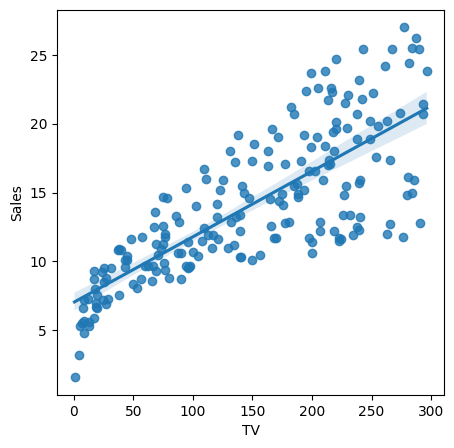

In [10]:
plt.figure(figsize=(5,5))
sns.regplot(x='TV',y='Sales',data=df)

<Axes: xlabel='Newspaper', ylabel='Sales'>

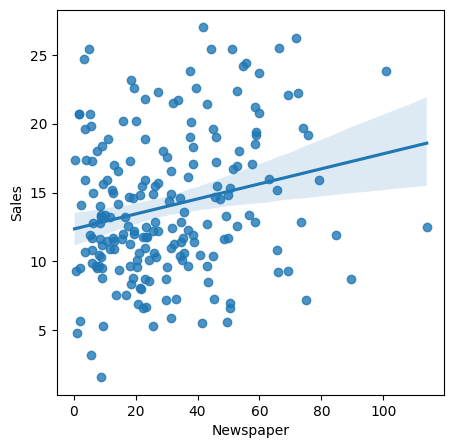

In [11]:
plt.figure(figsize=(5,5))
sns.regplot(x='Newspaper',y='Sales',data=df)

<Axes: xlabel='Radio', ylabel='Sales'>

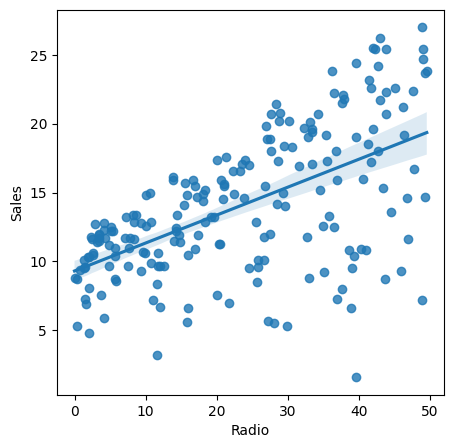

In [12]:
plt.figure(figsize=(5,5))
sns.regplot(x='Radio',y='Sales',data=df)

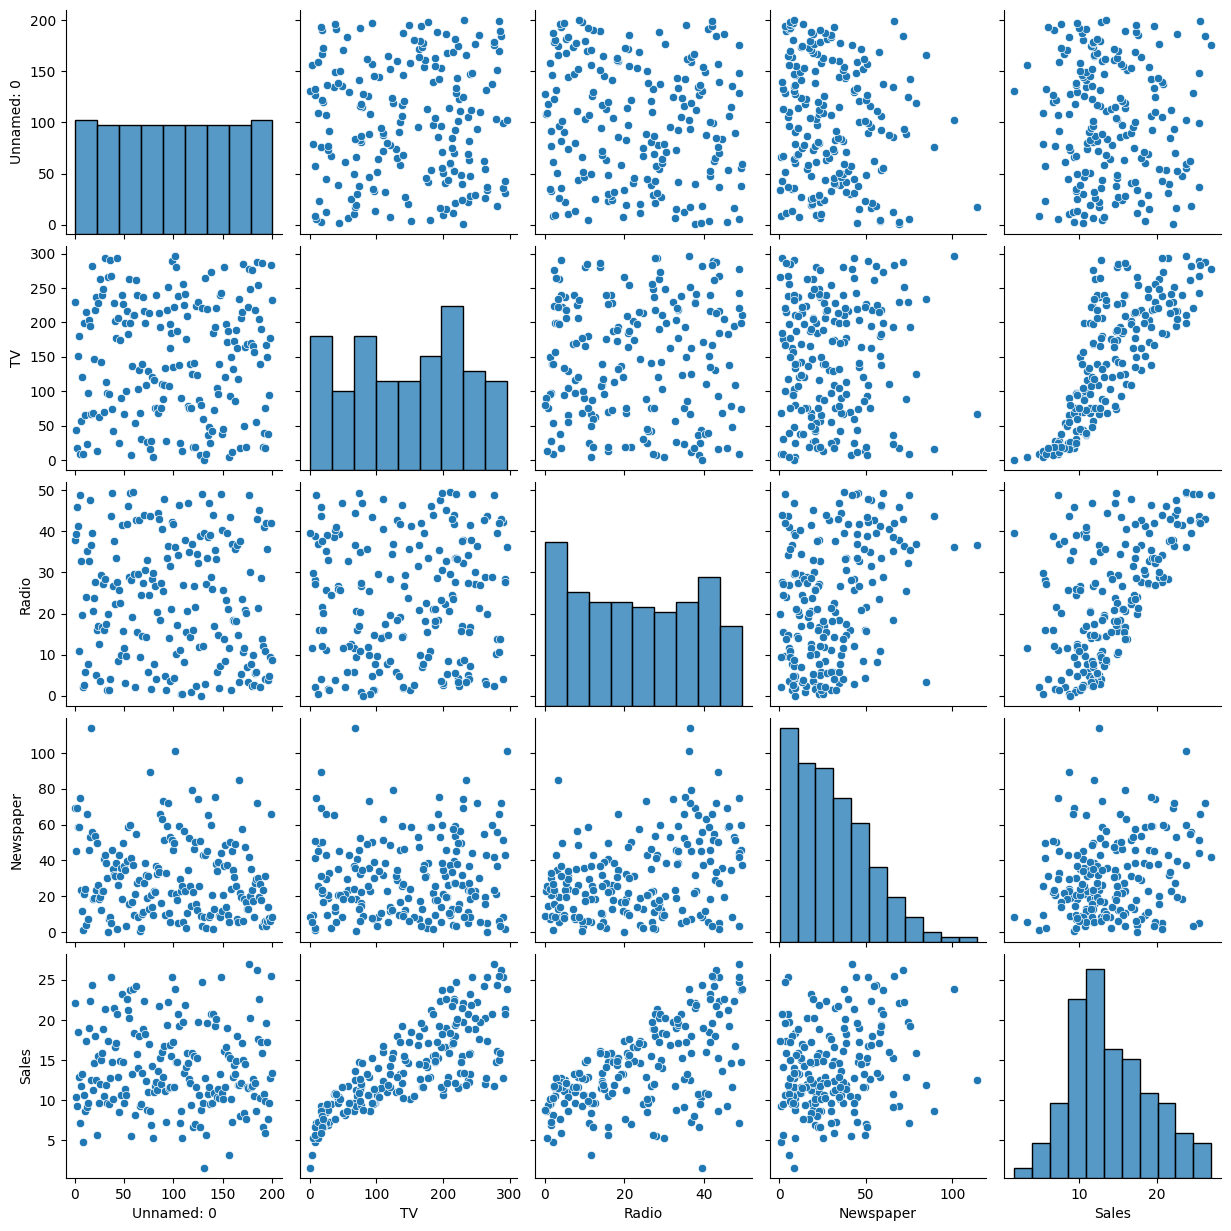

In [13]:
sns.pairplot(df)

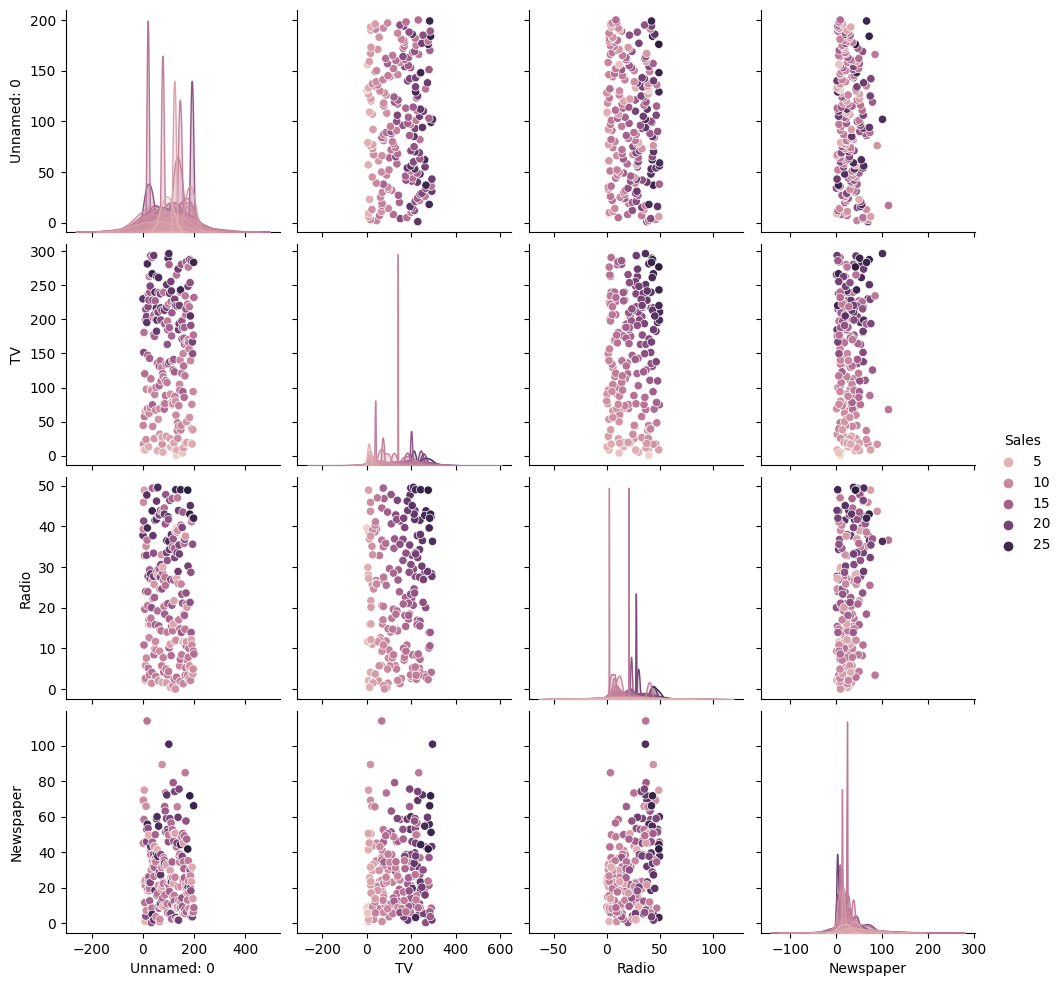

In [14]:
sns.pairplot(data = df , hue = 'Sales')

<Axes: xlabel='Sales', ylabel='Count'>

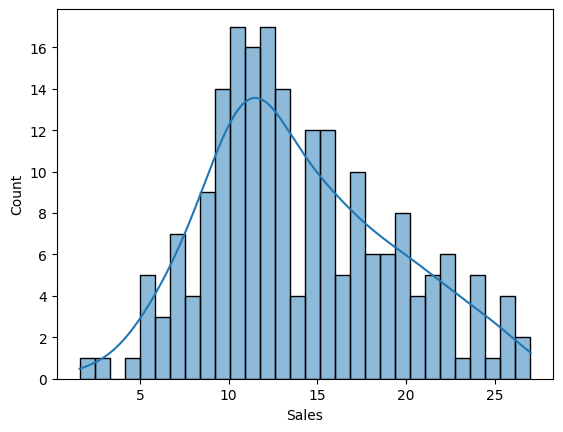

In [15]:
sns.histplot(df['Sales'],bins=30, kde=True)

<Axes: >

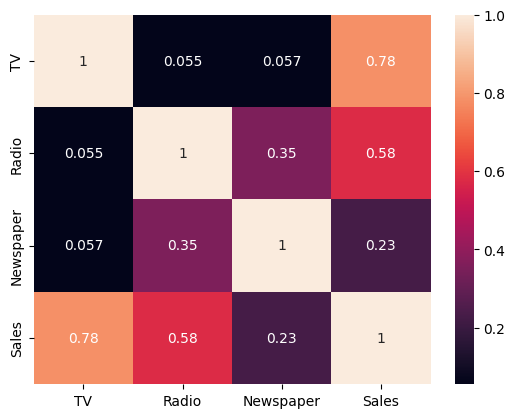

In [16]:
cor_mat = df[["TV", "Radio", "Newspaper", "Sales"]].corr()
sns.heatmap(cor_mat, annot=True)

<Axes: >

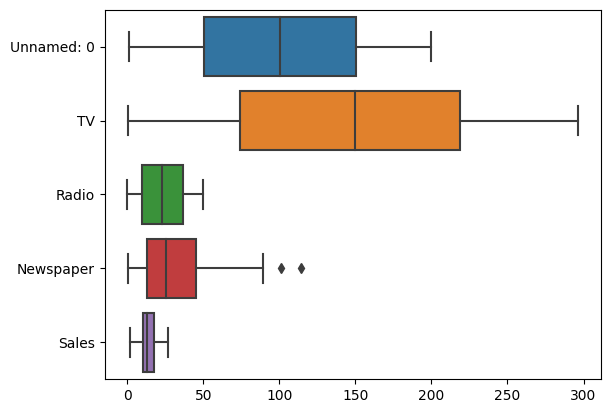

In [17]:
sns.boxplot(data=df,orient='h')

<Axes: >

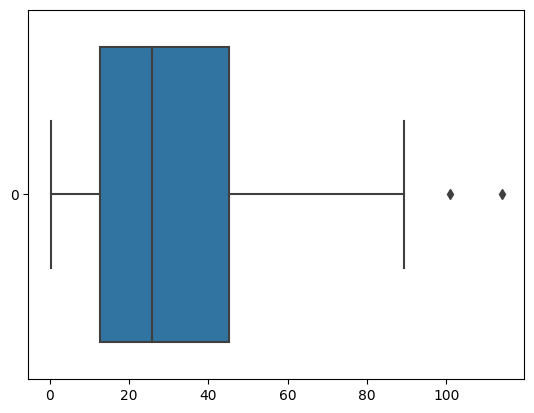

In [18]:
sns.boxplot(data=df['Newspaper'],orient='h')

In [19]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1

In [20]:
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

In [21]:
df1 = df[(df >= lower_bound) & (df <= upper_bound) | df.isnull()]

In [22]:
df1.head()

Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

In [23]:
df1.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     2
Sales         0
dtype: int64

In [24]:
df1['Newspaper'] = df1['Newspaper'].fillna(df1['Newspaper'].mean())

In [25]:
df1.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [26]:
df1.describe().T

count        mean        std  min     25%     50%      75%    max
Unnamed: 0  200.0  100.500000  57.879185  1.0  50.750  100.50  150.250  200.0
TV          200.0  147.042500  85.854236  0.7  74.375  149.75  218.825  296.4
Radio       200.0   23.264000  14.846809  0.0   9.975   22.90   36.525   49.6
Newspaper   200.0   29.777273  20.343298  0.3  12.750   25.75   43.550   89.4
Sales       200.0   14.022500   5.217457  1.6  10.375   12.90   17.400   27.0

<Axes: >

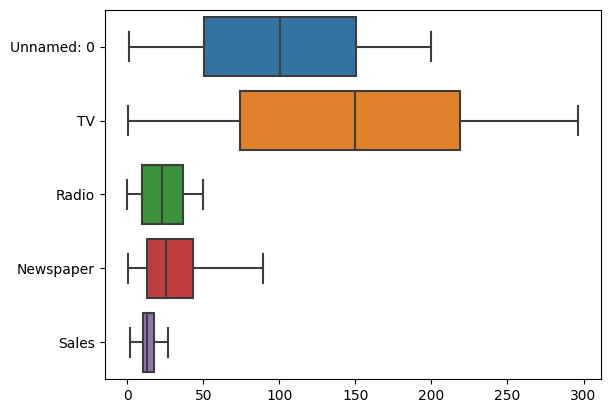

In [27]:
sns.boxplot(data=df1,orient='h')

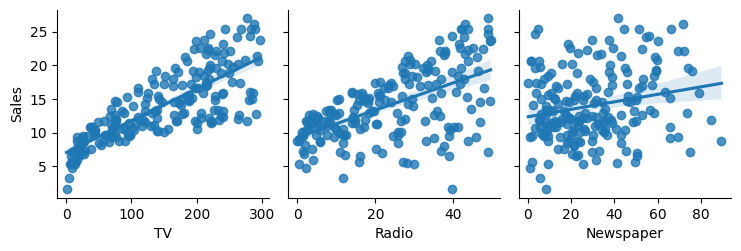

In [28]:
sns.pairplot(df1, x_vars=["TV","Radio","Newspaper"], y_vars=["Sales"], kind="reg")

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'TV'}>],
       [<Axes: title={'center': 'Radio'}>,
        <Axes: title={'center': 'Newspaper'}>],
       [<Axes: title={'center': 'Sales'}>, <Axes: >]], dtype=object)

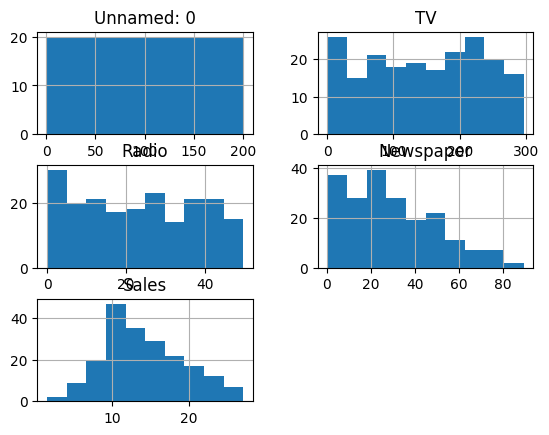

In [29]:
df1.hist(bins=10)

In [30]:
x = df1.drop('Sales', axis=1)
y = df1[["Sales"]]

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [31]:
X_train

Unnamed: 0     TV  Radio  Newspaper
79           80  116.0    7.7       23.1
197         198  177.0    9.3        6.4
38           39   43.1   26.7       35.1
24           25   62.3   12.6       18.3
122         123  224.0    2.4       15.6
..          ...    ...    ...        ...
106         107   25.0   11.0       29.7
14           15  204.1   32.9       46.0
92           93  217.7   33.5       59.0
179         180  165.6   10.0       17.6
102         103  280.2   10.1       21.4

[160 rows x 4 columns]

In [32]:
Y_train

Sales
79    11.0
197   12.8
38    10.1
24     9.7
122   11.6
..     ...
106    7.2
14    19.0
92    19.4
179   12.6
102   14.8

[160 rows x 1 columns]

In [33]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, Y_train)

LinearRegression()

In [34]:
y_pred_train = linear_reg.predict(X_train)
y_pred_test = linear_reg.predict(X_test)

In [35]:
train_mse = mean_squared_error(Y_train, y_pred_train)
test_mse = mean_squared_error(Y_test, y_pred_test)
train_r2 = r2_score(Y_train, y_pred_train)
test_r2 = r2_score(Y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 2.704968177013038
Testing MSE: 3.182552773601742
Training R2 Score: 0.8957070441172861
Testing R2 Score: 0.8991701389008739


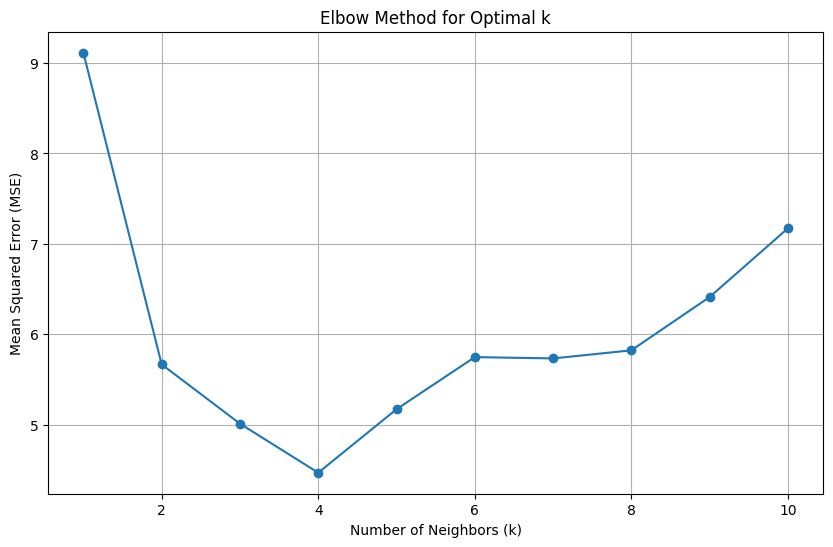

In [36]:
mse_values = []
r2_values = []
max_neighbors = 10  
for k in range(1, max_neighbors + 1):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(Y_test, y_pred)
    r2 = r2_score(Y_test, y_pred)
    mse_values.append(mse)
    r2_values.append(r2)
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_neighbors + 1), mse_values, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [37]:
optimal_k = mse_values.index(min(mse_values)) + 1
print(f"Optimal number of neighbors (k): {optimal_k}")

Optimal number of neighbors (k): 4


In [38]:
knn = KNeighborsRegressor(n_neighbors=optimal_k)
knn.fit(X_train, Y_train)

KNeighborsRegressor(n_neighbors=4)

In [39]:
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

In [40]:
train_mse = mean_squared_error(Y_train, y_pred_train)
test_mse = mean_squared_error(Y_test, y_pred_test)
train_r2 = r2_score(Y_train, y_pred_train)
test_r2 = r2_score(Y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 3.4380546874999993
Testing MSE: 4.469281249999999
Training R2 Score: 0.8674421056436455
Testing R2 Score: 0.8584039166959561


In [41]:
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_regressor = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error', verbose=1)

In [42]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_dt_regressor = DecisionTreeRegressor(**best_params)
best_dt_regressor.fit(X_train, Y_train)

Best Hyperparameters: {'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 5}


DecisionTreeRegressor(max_depth=9, min_samples_leaf=2, min_samples_split=5)

In [43]:
y_pred_train = best_dt_regressor.predict(X_train)
y_pred_test = best_dt_regressor.predict(X_test)

In [44]:
train_mse = mean_squared_error(Y_train, y_pred_train)
test_mse = mean_squared_error(Y_test, y_pred_test)
train_r2 = r2_score(Y_train, y_pred_train)
test_r2 = r2_score(Y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 0.1829999999999999
Testing MSE: 2.6133541666666664
Training R2 Score: 0.9929442382765434
Testing R2 Score: 0.9172035292506365


In [45]:
from sklearn.ensemble import RandomForestRegressor
param_grid = {
    'n_estimators': [10, 20, 30],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_regressor = RandomForestRegressor(random_state=10)
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=10), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 20, 30]},
             scoring='neg_mean_squared_error', verbose=1)

In [46]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_rf_regressor = RandomForestRegressor(**best_params)
best_rf_regressor.fit(X_train, Y_train)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 30}


RandomForestRegressor(max_depth=10, n_estimators=30)

In [47]:
y_pred_train = best_rf_regressor.predict(X_train)
y_pred_test = best_rf_regressor.predict(X_test)
train_mse = mean_squared_error(Y_train, y_pred_train)
test_mse = mean_squared_error(Y_test, y_pred_test)
train_r2 = r2_score(Y_train, y_pred_train)
test_r2 = r2_score(Y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 0.106726780207031
Testing MSE: 0.5688914278694643
Training R2 Score: 0.9958850342587293
Testing R2 Score: 0.9819763417190267


In [48]:
from xgboost import XGBRegressor
param_grid = {
    'n_estimators': [10, 20, 30],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}
xgb_regressor = XGBRegressor(random_state=10)
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=10, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7], 'n_estimators': [10, 20, 30]},
             scoring='neg_mean_squared_error', verbose=1)

In [49]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_xgb_regressor = XGBRegressor(**best_params, random_state=42)
best_xgb_regressor.fit(X_train, Y_train)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 30}


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=30, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [50]:
y_pred_train = best_xgb_regressor.predict(X_train)
y_pred_test = best_xgb_regressor.predict(X_test)
train_mse = mean_squared_error(Y_train, y_pred_train)
test_mse = mean_squared_error(Y_test, y_pred_test)
train_r2 = r2_score(Y_train, y_pred_train)
test_r2 = r2_score(Y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 0.1904295264688869
Testing MSE: 0.9511365290391287
Training R2 Score: 0.9926577848968572
Testing R2 Score: 0.9698660255048072


In [51]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}
results = []
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_mse = mean_squared_error(Y_train, y_pred_train)
    test_mse = mean_squared_error(Y_test, y_pred_test)
    train_r2 = r2_score(Y_train, y_pred_train)
    test_r2 = r2_score(Y_test, y_pred_test)
    results.append({'Model': name,
                    'Training MSE': train_mse,
                    'Testing MSE': test_mse,
                    'Training R2 Score': train_r2,
                    'Testing R2 Score': test_r2})
results_df = pd.DataFrame(results)
results_df

Model  Training MSE  Testing MSE  Training R2 Score  \
0  Linear Regression  2.704968e+00     3.182553           0.895707   
1      Decision Tree  2.366583e-31     1.762750           1.000000   
2      Random Forest  1.031940e-01     0.666307           0.996021   
3            XGBoost  1.634084e-06     0.881711           1.000000   

   Testing R2 Score  
0          0.899170  
1          0.944152  
2          0.978890  
3          0.972066

In [52]:

linear_model = sm.OLS.from_formula(formula="Sales ~ TV + Radio + Newspaper", data=df1).fit()

In [53]:
print(linear_model.params, "\n")

Intercept    2.942325
TV           0.045763
Radio        0.188556
Newspaper   -0.001194
dtype: float64 



In [54]:
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 20 Sep 2024   Prob (F-statistic):           1.57e-96
Time:                        04:07:56   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9423      0.315      9.326      0.0